In [70]:
# importing baseline packages
import os

# importing data processing packages
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# importing machine learning packages
from sklearn.model_selection import train_test_split

# importing visualisation libraries
import matplotlib.pyplot as plt
plt.style.use('../conf/custom_mpl_stylesheet.mplstyle')

# import custom classes
import custom_utils

In [9]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [25]:
missing_val_cols = [var for var in train.columns if train[var].isna().sum() > 0]
train[missing_val_cols]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [40]:
train.groupby('MoSold')['SalePrice'].mean()

MoSold
1     183256.258621
2     177882.000000
3     183253.924528
4     171503.262411
5     172307.269608
6     177395.735178
7     186331.192308
8     184651.827869
9     195683.206349
10    179563.977528
11    192210.911392
12    186518.966102
Name: SalePrice, dtype: float64

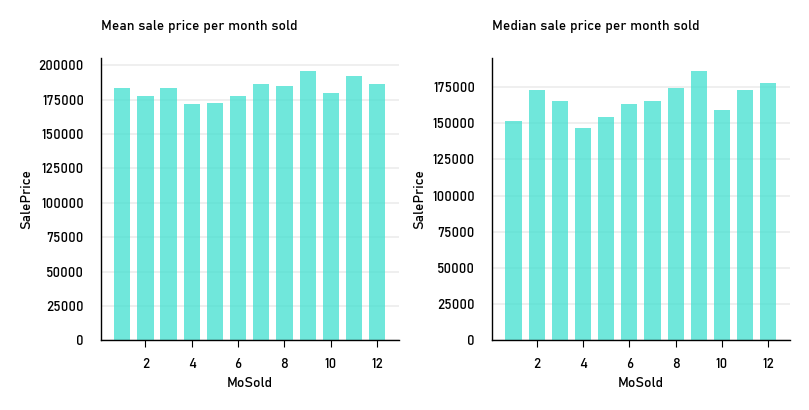

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=100)
axes[0].bar(train.groupby('MoSold')['SalePrice'].mean().index, train.groupby('MoSold')['SalePrice'].mean(), color='turquoise', width=0.7, alpha=0.75)
axes[0].set_xlabel('MoSold')
axes[0].set_ylabel('SalePrice')
axes[0].set_title('Mean sale price per month sold')
axes[1].bar(train.groupby('MoSold')['SalePrice'].median().index, train.groupby('MoSold')['SalePrice'].median(),  color='turquoise', width=0.7, alpha=0.75)
axes[1].set_xlabel('MoSold')
axes[1].set_ylabel('SalePrice')
axes[1].set_title('Median sale price per month sold')

plt.tight_layout()
plt.show()